In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_diabetes = pd.read_csv("../input/early-diabetes-classification/diabetes_data.csv", sep = ';')

In [3]:
df_diabetes

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [4]:
print(df_diabetes.shape)
print(df_diabetes["class"].unique())

(520, 17)
[1 0]


**Disini terlihat bahwa data mempunyai baris higga 520 dan 16 kolom predictor untuk kelas diabetes. Kelas diabetes didefinisikan angka 1 dan 0. Selanjutnya kita ubah data gender dari text menjadi variabel binari**

In [5]:
df_diabetes["gender"] = df_diabetes["gender"].apply({"Male":1, "Female":0}.get)
df_diabetes.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


**Selanjutnya kita pisah data menjadi dataset training dan test dan kita akan gunakan algoritma Klasifikasi Random Forest**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
X = df_diabetes[df_diabetes.columns[:-1]]
X

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [8]:
Y = df_diabetes[df_diabetes.columns[-1]]
Y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64

In [9]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[-0.6613669 ,  0.76509206, -0.99233705, ...,  1.29099445,
         1.38022749,  2.21564684],
       [ 0.82136224,  0.76509206, -0.99233705, ..., -0.77459667,
         1.38022749, -0.45133547],
       [-0.57899306,  0.76509206,  1.00772212, ...,  1.29099445,
         1.38022749, -0.45133547],
       ...,
       [ 0.82136224, -1.30703226,  1.00772212, ...,  1.29099445,
        -0.72451824,  2.21564684],
       [-1.32035762, -1.30703226, -0.99233705, ..., -0.77459667,
         1.38022749, -0.45133547],
       [-0.49661921,  0.76509206, -0.99233705, ..., -0.77459667,
        -0.72451824, -0.45133547]])

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, 
                                                    Y, 
                                                    test_size=0.4, 
                                                    random_state=101)

In [11]:
X_test[0]

array([-0.00237617,  0.76509206,  1.00772212,  1.10984668,  1.18165704,
       -1.19105191,  1.09274555,  1.86621505, -0.90102535, -0.97342978,
       -0.56550593,  1.08431186, -0.86991767, -0.77459667, -0.72451824,
       -0.45133547])

# Data Analisis

**Sebelum melakukan training data kita akan mengeksplorasi dataset terlebih dahulu untuk mengetahui profil gender dan usia dari dataset serta hubungannya dengan kelas**

<AxesSubplot:xlabel='gender', ylabel='count'>

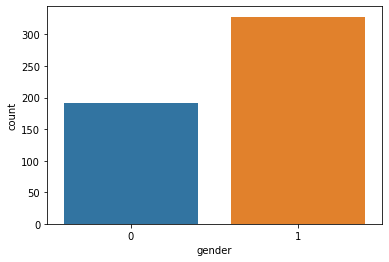

In [12]:
sns.countplot(x="gender", data=df_diabetes)

<AxesSubplot:xlabel='class', ylabel='count'>

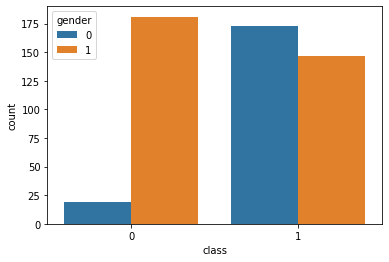

In [13]:
sns.countplot(x="class", hue="gender", data=df_diabetes)


<AxesSubplot:xlabel='age', ylabel='Count'>

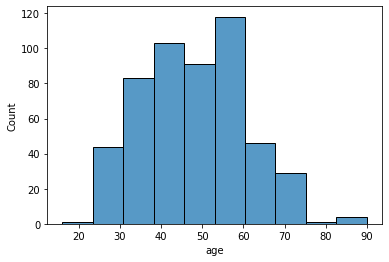

In [14]:
sns.histplot(df_diabetes["age"], kde=False, bins=10)

**Dari analisis awal, kita memiliki dataset mayoritas perempuan tetapi lebih banyak laki laki yang didiagnosis dengan diabetes. Selain itu, histogram menunjukkan bahwa kita memiliki kelompok usia mayoritas 50-60 tahun**

# METODE

**Kita akan menggunakan metode klasifikasi Random Forest**

Random forest (RF) adalah suatu algoritma yang digunakan pada klasifikasi data dalam jumlah yang besar. Klasifikasi random forest dilakukan melalui penggabungan pohon (tree) dengan melakukan training pada sampel data yang dimiliki. Penggunaan pohon (tree) yang semakin banyak akan mempengaruhi akurasi yang akan didapatkan menjadi lebih baik.

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [16]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)

RandomForestClassifier()

**Evaluasi Model**

In [17]:
predictions_rfc = rfc.predict(X_test)

In [18]:
print(classification_report(Y_test, predictions_rfc))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        83
           1       0.98      0.98      0.98       125

    accuracy                           0.98       208
   macro avg       0.97      0.98      0.97       208
weighted avg       0.98      0.98      0.98       208



In [19]:
print(confusion_matrix(Y_test, predictions_rfc))

[[ 81   2]
 [  3 122]]


**Melakukan Prediksi**

In [20]:
A = [[40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1]]
B = [[32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0]]

In [21]:
predictions_A = rfc.predict(A)
predictions_A

array([1])

In [22]:
predictions_B = rfc.predict(B)
predictions_B

array([0])